In [4]:
from scipy.stats import norm, beta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.reset_defaults()

In [5]:
def reward_scalar(x, double_peaks=False):
    if double_peaks and x > 0.5 and x < 2:
        return 0.5
    if x > -1.0 and x < -0.8:
        return 1.0
    return 0.0

reward = np.vectorize(reward_scalar)

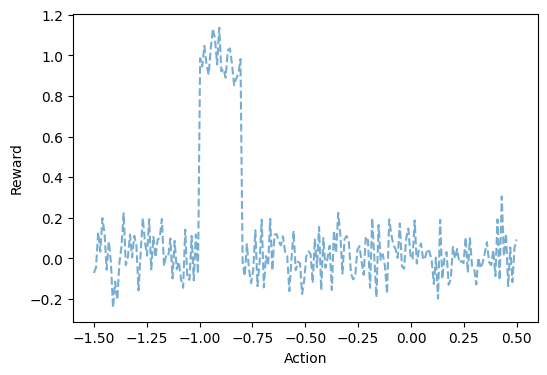

In [6]:
x = np.linspace(-1.5, 0.5, 200)
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
axes.plot(x, reward(x) + 0.1 * np.random.randn(x.shape[0]),
             linestyle='--', label='Reward function', alpha=0.6)
axes.set_ylabel('Reward')
axes.set_xlabel('Action')
plt.show()

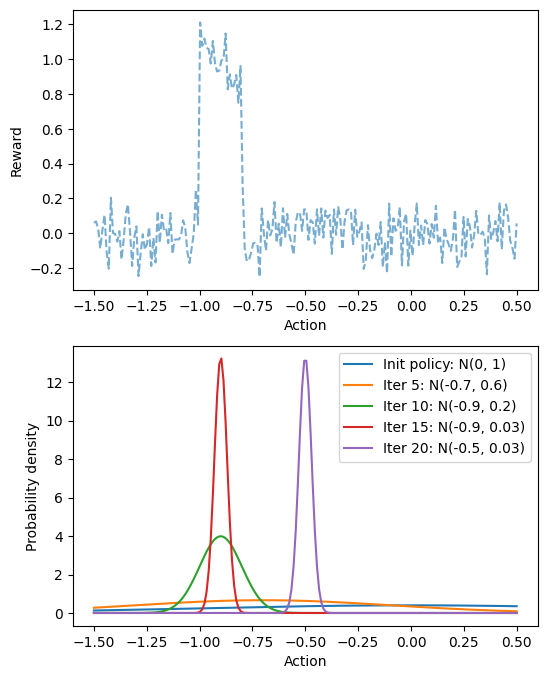

In [3]:
rv = norm(loc=0, scale=1)
rv1 = norm(loc=-0.7, scale=0.6)
rv2 = norm(loc=-0.9, scale=0.1)
rv3 = norm(loc=-0.9, scale=0.03)
rv4 = norm(loc=-0.5, scale=0.03)
x = np.linspace(-1.5, 0.5, 200)
fig, axes = plt.subplots(2, 1, figsize=(6, 8))
eta = 0.3
axes[0].plot(x, reward(x) + 0.1 * np.random.randn(x.shape[0]),
             linestyle='--', label='Reward function', alpha=0.6)
axes[0].set_ylabel('Reward')
axes[0].set_xlabel('Action')
axes[1].plot(x, rv.pdf(x), linestyle='-', label='Init policy: N(0, 1)')
axes[1].plot(x, rv1.pdf(x), linestyle='-', label='Iter 5: N(-0.7, 0.6)')
axes[1].plot(x, rv2.pdf(x), linestyle='-', label='Iter 10: N(-0.9, 0.1)')
axes[1].plot(x, rv3.pdf(x), linestyle='-', label='Iter 15: N(-0.9, 0.03)')
axes[1].plot(x, rv4.pdf(x), linestyle='-', label='Iter 20: N(-0.5, 0.03)')
axes[1].set_ylabel('Probability density')
axes[1].set_xlabel('Action')
#axes[1].set_yscale('log')
plt.legend(loc='upper right')
plt.show()

In [45]:
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 

In [100]:
def get_reward(x):
    noise = np.random.randn() * 0.1
    if x < -1 or x > -0.8:
        return noise
    elif x < -0.8:
        return noise + 1

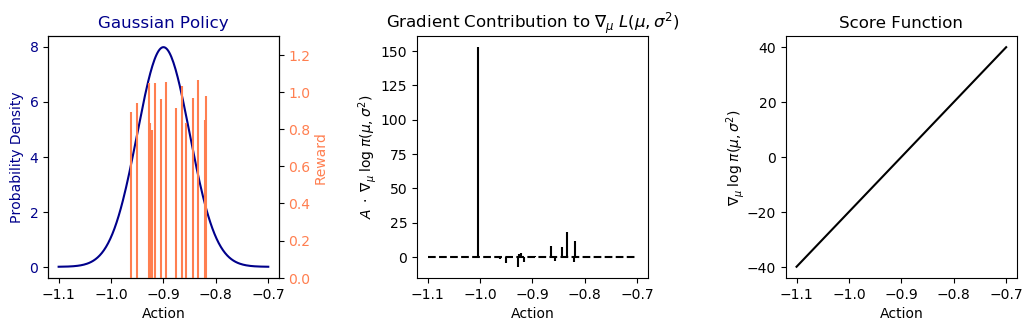

In [267]:
mu = -0.9
sigma = 0.05
rv3 = norm(loc=mu, scale=sigma)
x = np.linspace(-1.1, -0.7, 200)
fig, axes = plt.subplots(1, 3, figsize=(13, 3.5), sharex=True)
rewards = np.vectorize(get_reward)(x)


axes[0].plot(x, rv3.pdf(x), linestyle='-', label='Prev Policy: N(-0.9, 0.1)',color='darkblue')
axes[0].tick_params(axis='y', labelcolor='darkblue')
axes[0].set_ylabel('Probability Density',color='darkblue')
axes[0].set_xlabel('Action')
axes[0].set_title('Gaussian Policy', color='darkblue')
#axes[0].set_xlim([-1.1, -0.7])


ax1_twin = axes[0].twinx()
#ax1_twin.plot(x, rewards, linestyle='--', label='Reward', color='lightblue')
ax1_twin.tick_params(axis='y', labelcolor='coral')
#ax1_twin.set_ylim([0, 2])
ax1_twin.set_ylabel('Reward', color='coral',labelpad=2)


#axes[1].plot(x, s, linestyle='-', label=r'Score Function $\frac{\partial}{\partial \mu}\log \pi(x|\mu,\sigma^2)$', color='purple')
#axes[1].set_ylabel('Score function',color='purple', labelpad=-5)
#axes[1].tick_params(axis='y', labelcolor='purple')
#axes[1].set_xlabel('Action')
x = np.sort(rv3.rvs(16))
from matplotlib.patches import Circle
rewards = np.vectorize(get_reward)(x)
for i in range(len(x)):
    ax1_twin.vlines(x[i], 0, rewards[i], color='coral')
    #ax1_twin.add_artist(Circle((x, rewards[i]), radius=0.2))
ax1_twin.set_ylim([0, 1.3])

# grad_mu (log pi(theta))
s = (x - mu) / (sigma ** 2)
# policy gradient on mu
gradmu = (rewards - np.mean(rewards)) / np.std(rewards) * s


ax2_twin = axes[1]
#ax2_twin.plot(x, gradmu, linestyle='-', label=r'Gradient contribution to $\frac{\partial}{\partial\mu}L(\mu, \sigma^2)$', color='coral')
for i in range(len(x)):
    ax2_twin.vlines(x[i], 0, gradmu[i])
ax2_twin.set_ylabel(r'$A\;\cdot\;\nabla_{\mu}\; \log\;\pi(\mu,\sigma^2)$',labelpad=1)
ax2_twin.set_title(r'Gradient Contribution to $\nabla_\mu\;L(\mu,\sigma^2)$', fontsize=12)
ax2_twin.tick_params(axis='y')
ax2_twin.hlines(0, -1.1, -0.7, ls='--')
axes[1].set_xlabel('Action')

x = np.linspace(-1.1, -0.7, 200)
s = (x - mu) / (2 * sigma ** 2)
axes[2].set_xlabel('Action')
axes[2].plot(x, s, color='black')
axes[2].set_title('Score Function')
axes[2].set_ylabel(r'$\nabla_{\mu}\; \log\;\pi(\mu,\sigma^2)$', labelpad=0)

#axes[1].set_yscale('log')
fig.subplots_adjust(top=0.8, wspace=0.6, right=0.87)
#fig.legend(loc='upper center', ncol=4)
plt.show()

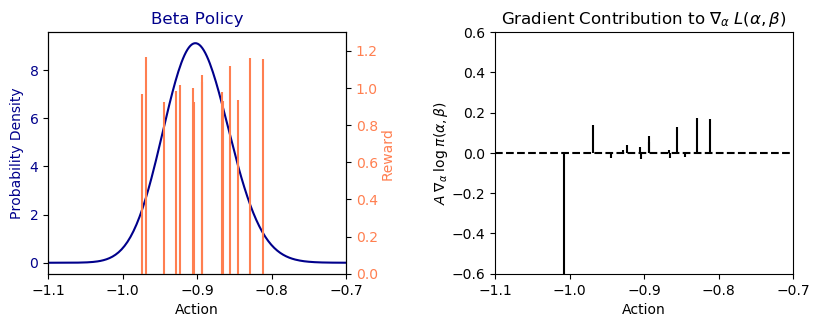

In [217]:
rv3 = beta(a=150, b=600, loc=-1.5, scale=3)
x = np.linspace(-1.1, -0.7, 200)
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharex=True)
rewards = np.vectorize(get_reward)(x)


axes[0].plot(x, rv3.pdf(x), linestyle='-', label='Prev Policy: N(-0.9, 0.1)',color='darkblue')
axes[0].tick_params(axis='y', labelcolor='darkblue')
axes[0].set_ylabel('Probability Density', color='darkblue')
axes[0].set_xlabel('Action')
axes[0].set_xlim([-1.1, -0.7])
axes[0].set_title('Beta Policy', color='darkblue')
#axes[0].text(-1.1, 8, "Beta Distribution", ha="left", va="center", size=12, color='darkblue')

ax1_twin = axes[0].twinx()
ax1_twin.tick_params(axis='y', labelcolor='coral')
ax1_twin.set_ylabel('Reward', color='coral',labelpad=2)


x = np.sort(rv3.rvs(16))
from matplotlib.patches import Circle
rewards = np.vectorize(get_reward)(x)
for i in range(len(x)):
    ax1_twin.vlines(x[i], 0, rewards[i], color='coral')
    #ax1_twin.add_artist(Circle((x, rewards[i]), radius=0.2))
ax1_twin.set_ylim([0, 1.3])

# grad_mu (log pi(theta))
# log likelihood is (a-1)x+ (b-1)(1-x)
s = (x - (-1.5)) / 3
# policy gradient on mu
gradalpha = (rewards - np.mean(rewards)) / np.std(rewards) * s
#axes[1].plot(x, s)


ax2_twin = axes[1]
#ax2_twin.plot(x, gradmu, linestyle='-', label=r'Gradient contribution to $\frac{\partial}{\partial\mu}L(\mu, \sigma^2)$', color='coral')
for i in range(len(x)):
    ax2_twin.vlines(x[i], 0, gradalpha[i])
ax2_twin.set_ylabel(r'$A\;\nabla_{\alpha}\; \log\;\pi(\alpha,\beta)$',labelpad=1)
ax2_twin.set_title(r'Gradient Contribution to $\nabla_\alpha\;L(\alpha, \beta)$')
ax2_twin.tick_params(axis='y')
ax2_twin.hlines(0, -1.1, -0.7, ls='--')
ax2_twin.set_ylim([-0.6, 0.6])

axes[1].set_xlabel('Action')
#axes[1].set_yscale('log')
fig.subplots_adjust(top=0.8, wspace=0.5, right=0.87)
#fig.legend(loc='upper center', ncol=4)
plt.show()

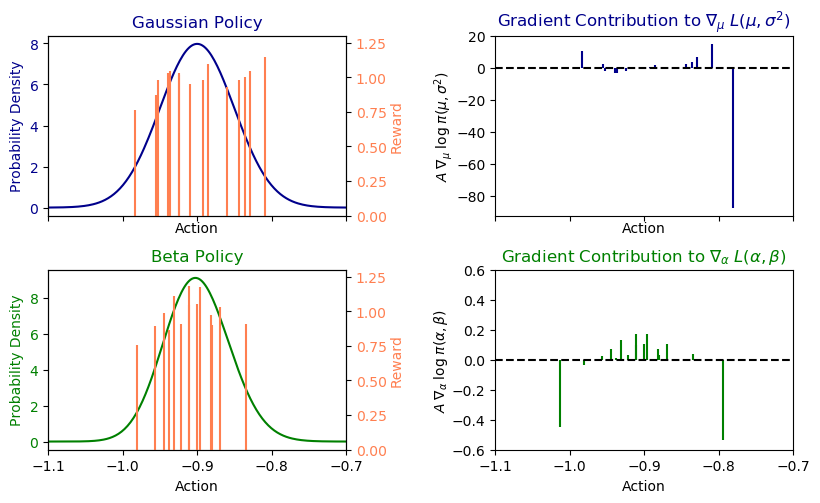

In [239]:
mu = -0.9
sigma = 0.05
rvnorm = norm(loc=mu, scale=sigma)
x_uniform = np.linspace(-1.1, -0.7, 200)
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True)
axes = axes.flatten()
rewards = np.vectorize(get_reward)(x)


axes[0].plot(x_uniform, rvnorm.pdf(x_uniform), linestyle='-', label='Prev Policy: N(-0.9, 0.1)',color='darkblue')
axes[0].tick_params(axis='y', labelcolor='darkblue')
axes[0].set_ylabel('Probability Density',color='darkblue')
axes[0].set_xlabel('Action')
axes[0].set_title('Gaussian Policy', color='darkblue')
#axes[0].set_xlim([-1.1, -0.7])


ax1_twin = axes[0].twinx()
#ax1_twin.plot(x, rewards, linestyle='--', label='Reward', color='lightblue')
ax1_twin.tick_params(axis='y', labelcolor='coral')
#ax1_twin.set_ylim([0, 2])
ax1_twin.set_ylabel('Reward', color='coral',labelpad=2)


#axes[1].plot(x, s, linestyle='-', label=r'Score Function $\frac{\partial}{\partial \mu}\log \pi(x|\mu,\sigma^2)$', color='purple')
#axes[1].set_ylabel('Score function',color='purple', labelpad=-5)
#axes[1].tick_params(axis='y', labelcolor='purple')
#axes[1].set_xlabel('Action')
x_normsamples = np.sort(rvnorm.rvs(16))
from matplotlib.patches import Circle
rewards = np.vectorize(get_reward)(x_normsamples)
for i in range(len(x)):
    ax1_twin.vlines(x_normsamples[i], 0, rewards[i], color='coral')
    #ax1_twin.add_artist(Circle((x, rewards[i]), radius=0.2))
ax1_twin.set_ylim([0, 1.3])

# grad_mu (log pi(theta))
s = (x_normsamples - mu) / (2 * sigma ** 2)
# policy gradient on mu
gradmu = (rewards - np.mean(rewards)) / np.std(rewards) * s


ax2_twin = axes[1]
#ax2_twin.plot(x, gradmu, linestyle='-', label=r'Gradient contribution to $\frac{\partial}{\partial\mu}L(\mu, \sigma^2)$', color='coral')
for i in range(len(x_normsamples)):
    ax2_twin.vlines(x_normsamples[i], 0, gradmu[i], color='darkblue')
ax2_twin.set_ylabel(r'$A\;\nabla_{\mu}\; \log\;\pi(\mu,\sigma^2)$',labelpad=1)
ax2_twin.set_title(r'Gradient Contribution to $\nabla_\mu\;L(\mu,\sigma^2)$', color='darkblue')
ax2_twin.tick_params(axis='y')
ax2_twin.hlines(0, -1.1, -0.7, ls='--')
axes[1].set_xlabel('Action')

############################################################################### Beta #############

rvbeta = beta(a=150, b=600, loc=-1.5, scale=3)
axes[2].plot(x_uniform, rvbeta.pdf(x_uniform), linestyle='-', label='Prev Policy: N(-0.9, 0.1)',color='green')
axes[2].tick_params(axis='y', labelcolor='green')
axes[2].set_ylabel('Probability Density', color='green')
axes[2].set_xlabel('Action')
axes[2].set_xlim([-1.1, -0.7])
axes[2].set_title('Beta Policy', color='green')
#axes[0].text(-1.1, 8, "Beta Distribution", ha="left", va="center", size=12, color='darkblue')

ax1_twin = axes[2].twinx()
ax1_twin.tick_params(axis='y', labelcolor='coral')
ax1_twin.set_ylabel('Reward', color='coral',labelpad=2)


x_betasamples = np.sort(rvbeta.rvs(16))
from matplotlib.patches import Circle
rewards = np.vectorize(get_reward)(x_betasamples)
for i in range(len(x)):
    ax1_twin.vlines(x_betasamples[i], 0, rewards[i], color='coral')
    #ax1_twin.add_artist(Circle((x, rewards[i]), radius=0.2))
ax1_twin.set_ylim([0, 1.3])

# grad_mu (log pi(theta))
# log likelihood is (a-1)x+ (b-1)(1-x)
s = (x_betasamples - (-1.5)) / 3
s_uniform = (x_uniform - (-1.5)) / 3
# policy gradient on mu
gradalpha = (rewards - np.mean(rewards)) / np.std(rewards) * s
#axes[1].plot(x, s)


ax2_twin = axes[3]
#ax2_twin.plot(x, gradmu, linestyle='-', label=r'Gradient contribution to $\frac{\partial}{\partial\mu}L(\mu, \sigma^2)$', color='coral')
for i in range(len(x_betasamples)):
    ax2_twin.vlines(x_betasamples[i], 0, gradalpha[i], color='green')
ax2_twin.set_ylabel(r'$A\;\nabla_{\alpha}\; \log\;\pi(\alpha,\beta)$',labelpad=1)
ax2_twin.set_title(r'Gradient Contribution to $\nabla_\alpha\;L(\alpha, \beta)$', color='green')
ax2_twin.tick_params(axis='y')
ax2_twin.hlines(0, -1.1, -0.7, ls='--')
ax2_twin.set_ylim([-0.6, 0.6])
#ax2_twin.plot(x_uniform, s_uniform)
axes[3].set_xlabel('Action')
#axes[1].set_yscale('log')


fig.subplots_adjust(top=0.8, wspace=0.5, right=0.87, hspace=0.3)
#fig.legend(loc='upper center', ncol=4)
plt.show()

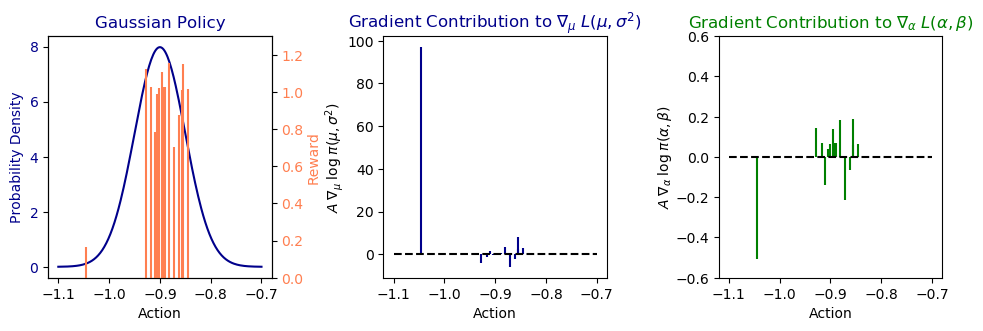

In [242]:
mu = -0.9
sigma = 0.05
rvnorm = norm(loc=mu, scale=sigma)
x_uniform = np.linspace(-1.1, -0.7, 200)
fig, axes = plt.subplots(1, 3, figsize=(12, 3.5), sharex=True)
axes = axes.flatten()
rewards = np.vectorize(get_reward)(x)


axes[0].plot(x_uniform, rvnorm.pdf(x_uniform), linestyle='-', label='Prev Policy: N(-0.9, 0.1)',color='darkblue')
axes[0].tick_params(axis='y', labelcolor='darkblue')
axes[0].set_ylabel('Probability Density',color='darkblue')
axes[0].set_xlabel('Action')
axes[0].set_title('Gaussian Policy', color='darkblue')
#axes[0].set_xlim([-1.1, -0.7])


ax1_twin = axes[0].twinx()
#ax1_twin.plot(x, rewards, linestyle='--', label='Reward', color='lightblue')
ax1_twin.tick_params(axis='y', labelcolor='coral')
#ax1_twin.set_ylim([0, 2])
ax1_twin.set_ylabel('Reward', color='coral',labelpad=2)


#axes[1].plot(x, s, linestyle='-', label=r'Score Function $\frac{\partial}{\partial \mu}\log \pi(x|\mu,\sigma^2)$', color='purple')
#axes[1].set_ylabel('Score function',color='purple', labelpad=-5)
#axes[1].tick_params(axis='y', labelcolor='purple')
#axes[1].set_xlabel('Action')
x_normsamples = np.sort(rvnorm.rvs(16))
from matplotlib.patches import Circle
rewards = np.vectorize(get_reward)(x_normsamples)
for i in range(len(x)):
    ax1_twin.vlines(x_normsamples[i], 0, rewards[i], color='coral')
    #ax1_twin.add_artist(Circle((x, rewards[i]), radius=0.2))
ax1_twin.set_ylim([0, 1.3])

# grad_mu (log pi(theta))
s = (x_normsamples - mu) / (2 * sigma ** 2)
# policy gradient on mu
gradmu = (rewards - np.mean(rewards)) / np.std(rewards) * s


ax2_twin = axes[1]
#ax2_twin.plot(x, gradmu, linestyle='-', label=r'Gradient contribution to $\frac{\partial}{\partial\mu}L(\mu, \sigma^2)$', color='coral')
for i in range(len(x_normsamples)):
    ax2_twin.vlines(x_normsamples[i], 0, gradmu[i], color='darkblue')
ax2_twin.set_ylabel(r'$A\;\nabla_{\mu}\; \log\;\pi(\mu,\sigma^2)$',labelpad=1)
ax2_twin.set_title(r'Gradient Contribution to $\nabla_\mu\;L(\mu,\sigma^2)$', color='darkblue')
ax2_twin.tick_params(axis='y')
ax2_twin.hlines(0, -1.1, -0.7, ls='--')
axes[1].set_xlabel('Action')

############################################################################### Beta #############

rvbeta = beta(a=150, b=600, loc=-1.5, scale=3)
# log likelihood is (a-1)x+ (b-1)(1-x)
s = (x_normsamples - (-1.5)) / 3
gradalpha = (rewards - np.mean(rewards)) / np.std(rewards) * s
#axes[1].plot(x, s)
ax2_twin = axes[2]
#ax2_twin.plot(x, gradmu, linestyle='-', label=r'Gradient contribution to $\frac{\partial}{\partial\mu}L(\mu, \sigma^2)$', color='coral')
for i in range(len(x_normsamples)):
    ax2_twin.vlines(x_normsamples[i], 0, gradalpha[i], color='green')
ax2_twin.set_ylabel(r'$A\;\nabla_{\alpha}\; \log\;\pi(\alpha,\beta)$',labelpad=1)
ax2_twin.set_title(r'Gradient Contribution to $\nabla_\alpha\;L(\alpha, \beta)$', color='green')
ax2_twin.tick_params(axis='y')
ax2_twin.hlines(0, -1.1, -0.7, ls='--')
ax2_twin.set_ylim([-0.6, 0.6])
#ax2_twin.plot(x_uniform, s_uniform)
ax2_twin.set_xlabel('Action')


fig.subplots_adjust(top=0.8, wspace=0.5, right=0.87, hspace=0.3)
#fig.legend(loc='upper center', ncol=4)
plt.show()

In [118]:
eta = 1. / 5.
x = rv.rvs(1000)
avg_reward = np.mean(reward(x))
advs = (reward(x) - avg_reward)
adv_stds = np.std(advs)
advs /= adv_stds
Z = np.mean(np.exp(eta * advs))

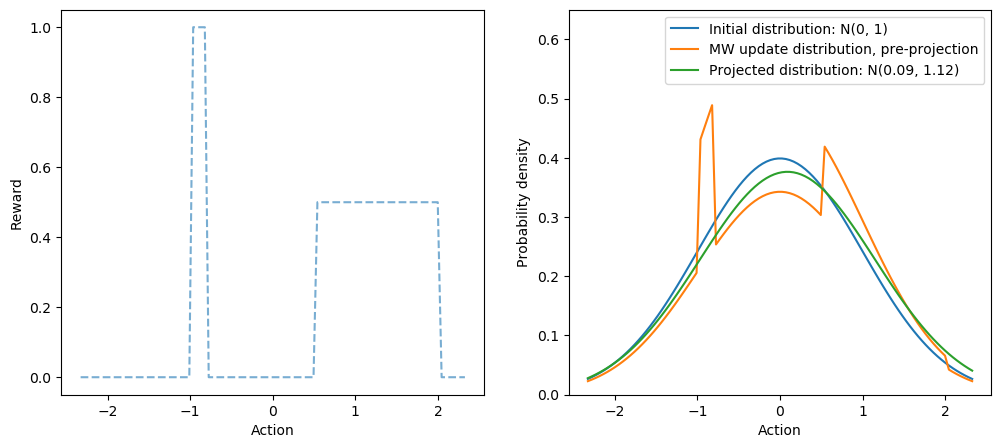

In [130]:
rv = norm(loc=0, scale=1)
rv2 = norm(loc=0.09, scale=1.06)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(x, reward(x), linestyle='--', label='Reward function', alpha=0.6)
axes[0].set_ylabel('Reward')
axes[0].set_xlabel('Action')
axes[1].plot(x, rv.pdf(x), linestyle='-', label='Initial distribution: N(0, 1)')
axes[1].plot(x, rv.pdf(x) * np.exp(eta * (reward(x) - avg_reward) / adv_stds) / Z, label='MW update distribution, pre-projection')
axes[1].plot(x, rv2.pdf(x), label='Projected distribution: N(0.09, 1.12)')
axes[1].set_ylabel('Probability density')
axes[1].set_xlabel('Action')
axes[1].set_ylim([0, 0.65])
plt.legend()
plt.show()

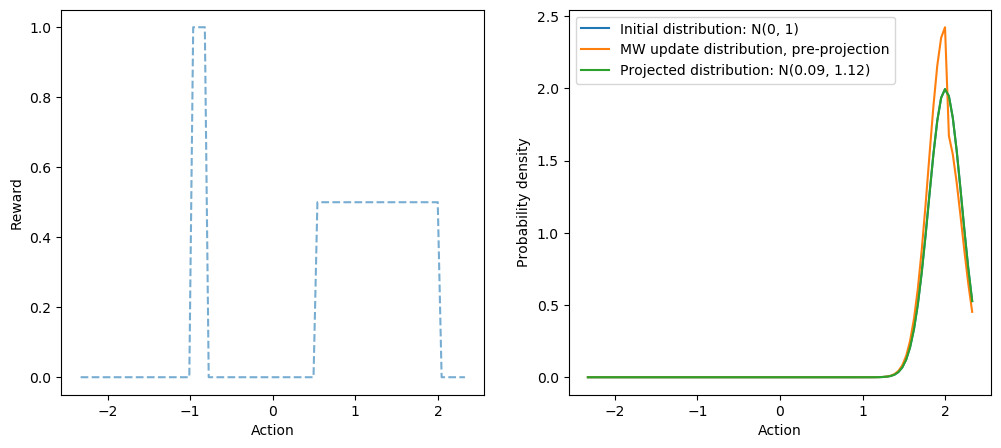

In [156]:
rv = norm(loc=2, scale=0.2)
rv2 = norm(loc=2, scale=0.2)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(x, reward(x), linestyle='--', label='Reward function', alpha=0.6)
axes[0].set_ylabel('Reward')
axes[0].set_xlabel('Action')
axes[1].plot(x, rv.pdf(x), linestyle='-', label='Initial distribution: N(0, 1)')
axes[1].plot(x, rv.pdf(x) * np.exp(eta * (reward(x) - avg_reward) / adv_stds) / Z, label='MW update distribution, pre-projection')
axes[1].plot(x, rv2.pdf(x), label='Projected distribution: N(0.09, 1.12)')
axes[1].set_ylabel('Probability density')
axes[1].set_xlabel('Action')
#axes[1].set_ylim([0, 2])
plt.legend()
plt.show()

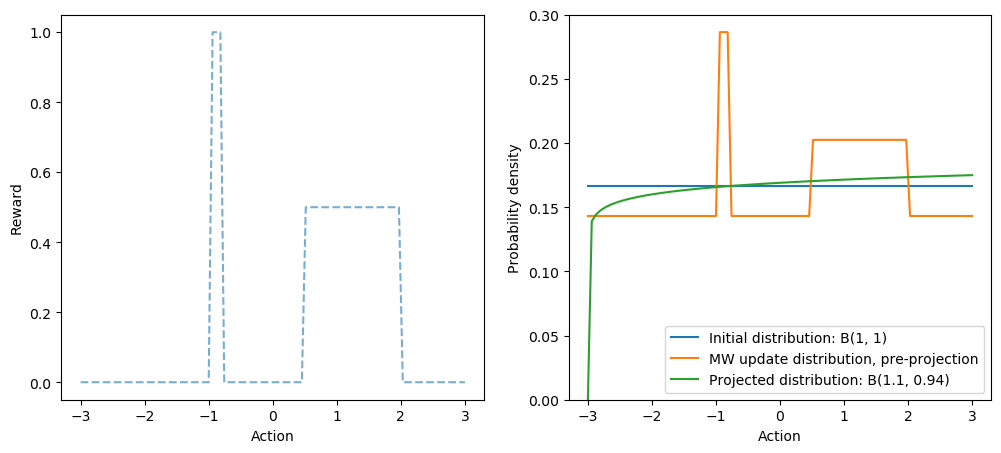

In [159]:
rv = beta(a=1, b=1, loc=-3, scale=6)
rv2 = beta(a=1.05, b=1, loc=-3, scale=6)
x = np.linspace(-3, 3, 100)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(x, reward(x), linestyle='--', label='Reward function', alpha=0.6)
axes[0].set_ylabel('Reward')
axes[0].set_xlabel('Action')
axes[1].plot(x, rv.pdf(x), linestyle='-', label='Initial distribution: B(1, 1)')
axes[1].plot(x, rv.pdf(x) * np.exp(eta * (reward(x) - avg_reward) / adv_stds) / Z, label='MW update distribution, pre-projection')
axes[1].plot(x, rv2.pdf(x), label='Projected distribution: B(1.1, 0.94)')
axes[1].set_ylabel('Probability density')
axes[1].set_xlabel('Action')
axes[1].set_ylim([0, 0.3])
plt.legend()
plt.show()

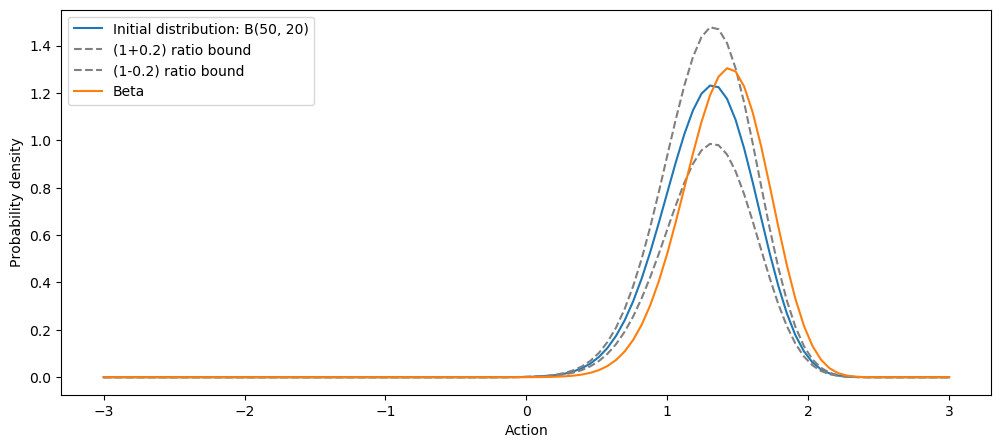

In [177]:
rv = beta(a=50, b=20, loc=-3, scale=6)
rv2 = beta(a=55, b=20, loc=-3, scale=6)
x = np.linspace(-3, 3, 100)
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
axes.plot(x, rv.pdf(x), linestyle='-', label='Initial distribution: B(50, 20)')
axes.plot(x, rv.pdf(x) * 1.2, label='(1+0.2) ratio bound', linestyle='--', color='grey')
axes.plot(x, rv.pdf(x) * 0.8, label='(1-0.2) ratio bound', linestyle='--', color='grey')
axes.plot(x, rv2.pdf(x), label='Beta')
axes.set_ylabel('Probability density')
axes.set_xlabel('Action')
#axes[0].set_ylim([0, 2])
plt.legend()
plt.show()

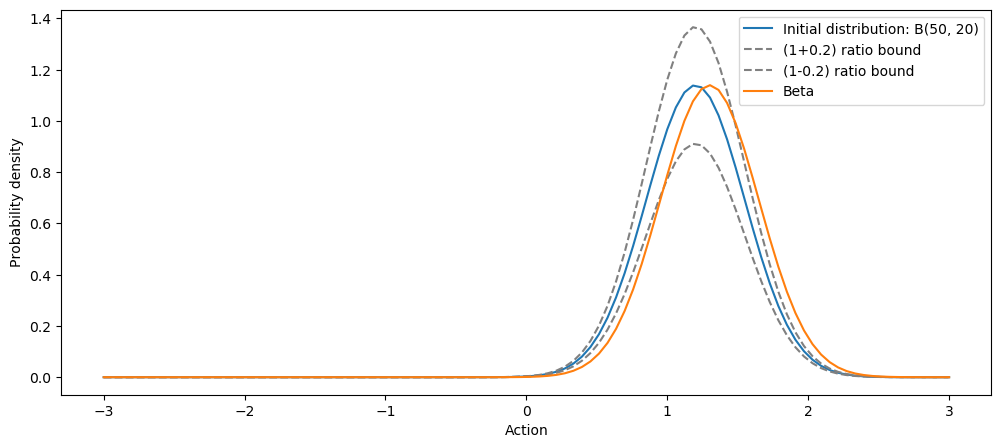

In [180]:
rv = norm(loc=1.2, scale=0.35)
rv2 = norm(loc=1.3, scale=0.35)
x = np.linspace(-3, 3, 100)
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
axes.plot(x, rv.pdf(x), linestyle='-', label='Initial distribution: B(50, 20)')
axes.plot(x, rv.pdf(x) * 1.2, label='(1+0.2) ratio bound', linestyle='--', color='grey')
axes.plot(x, rv.pdf(x) * 0.8, label='(1-0.2) ratio bound', linestyle='--', color='grey')
axes.plot(x, rv2.pdf(x), label='Beta')
axes.set_ylabel('Probability density')
axes.set_xlabel('Action')
#axes[0].set_ylim([0, 2])
plt.legend()
plt.show()

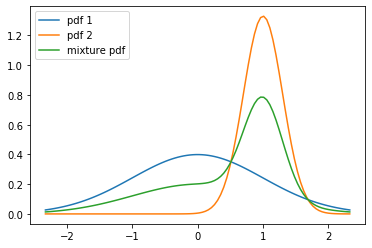

In [9]:
rv = norm(loc=0, scale=1)
rv2 = norm(loc=1, scale=0.3)
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
plt.plot(x, rv.pdf(x), label='pdf 1')
plt.plot(x, rv2.pdf(x), label='pdf 2')
plt.plot(x, 0.5*rv.pdf(x) + 0.5*rv2.pdf(x), label='mixture pdf')
plt.legend()

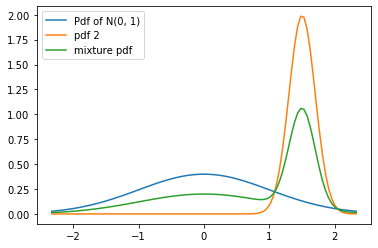

In [50]:
rv = norm(loc=0, scale=1)
rv2 = norm(loc=1.5, scale=0.2)
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
plt.plot(x, rv.pdf(x), label='Pdf of N(0, 1)')
plt.plot(x, rv2.pdf(x), label='pdf 2')
plt.plot(x, 0.5*rv.pdf(x) + 0.5*rv2.pdf(x), label='mixture pdf')
plt.legend()

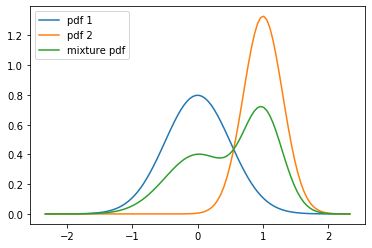

In [14]:
rv = norm(loc=0, scale=0.5)
rv2 = norm(loc=1, scale=0.3)
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
plt.plot(x, rv.pdf(x), label='pdf 1')
plt.plot(x, rv2.pdf(x), label='pdf 2')
plt.plot(x, 0.5*rv.pdf(x) + 0.5*rv2.pdf(x), label='mixture pdf')
plt.legend()

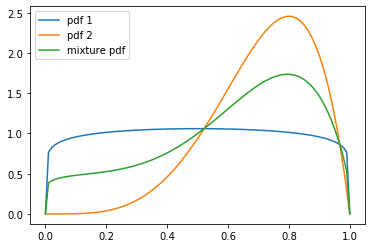

In [20]:
rv = beta(a=1.1, b=1.1)
rv2 = beta(a=5, b=2)
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1, 100)
plt.plot(x, rv.pdf(x), label='pdf 1')
plt.plot(x, rv2.pdf(x), label='pdf 2')
plt.plot(x, 0.5*rv.pdf(x) + 0.5*rv2.pdf(x), label='mixture pdf')
plt.legend()

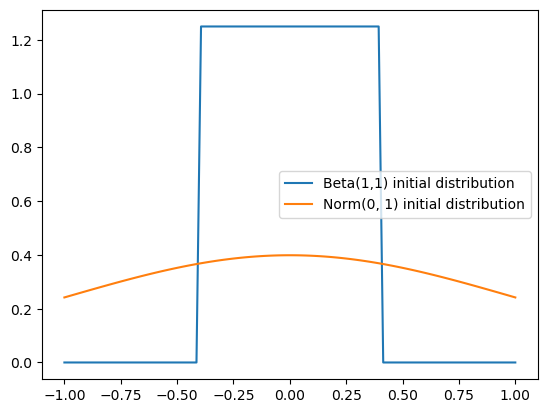

In [181]:
rv = beta(a=1, b=1, scale=0.8, loc=-0.4)
rv2 = norm(loc=0, scale=1)
fig, ax = plt.subplots(1, 1)
x = np.linspace(-1, 1, 100)
plt.plot(x, rv.pdf(x), label='Beta(1,1) initial distribution')
plt.plot(x, rv2.pdf(x), label='Norm(0, 1) initial distribution')
plt.legend()

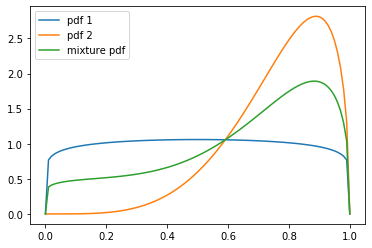

In [42]:
rv = beta(a=1.1, b=1.1)
rv2 = beta(a=5, b=1.5)
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1, 100)
plt.plot(x, rv.pdf(x), label='pdf 1')
plt.plot(x, rv2.pdf(x), label='pdf 2')
plt.plot(x, 0.5*rv.pdf(x) + 0.5*rv2.pdf(x), label='mixture pdf')
plt.legend()

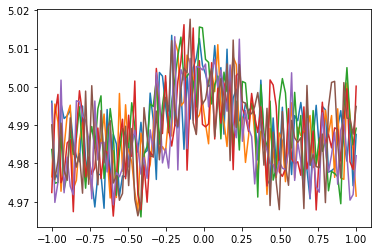

In [36]:
import gym
from functools import partial
env = gym.make('Humanoid-v2')

def get_reward(x, axis=0):
    env.reset()
    a = np.zeros(env.action_space.low.shape)
    a[axis] = x
    return env.step(a)[1]

x = np.linspace(-1, 1, 100)
plt.plot(x, np.vectorize(partial(get_reward, axis=0))(x))
plt.plot(x, np.vectorize(partial(get_reward, axis=1))(x))
plt.plot(x, np.vectorize(partial(get_reward, axis=2))(x))
plt.plot(x, np.vectorize(partial(get_reward, axis=3))(x))
plt.plot(x, np.vectorize(partial(get_reward, axis=4))(x))
plt.plot(x, np.vectorize(partial(get_reward, axis=5))(x))

(0.9998125660400348, 1.000856357111429, 0.9927378519225499, 0.9986167887756261)

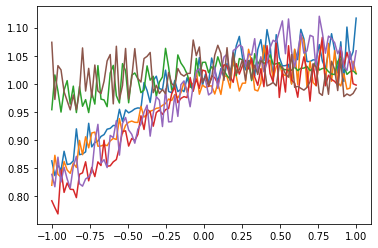

In [30]:
import gym
from functools import partial
env = gym.make('Walker2d-v2')

def get_reward(x, axis=0):
    env.reset()
    a = np.array([0.0, 0.2, -0.1, 0.3, 0.1, 0.5])
    a[axis] = x
    return env.step(a)[1]

x = np.linspace(-1, 1, 100)
plt.plot(x, np.vectorize(partial(get_reward, axis=0))(x))
plt.plot(x, np.vectorize(partial(get_reward, axis=1))(x))
plt.plot(x, np.vectorize(partial(get_reward, axis=2))(x))
plt.plot(x, np.vectorize(partial(get_reward, axis=3))(x))
plt.plot(x, np.vectorize(partial(get_reward, axis=4))(x))
plt.plot(x, np.vectorize(partial(get_reward, axis=5))(x))